In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

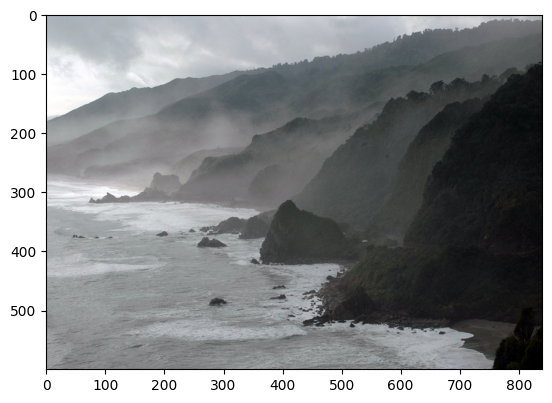

In [2]:
img_bgr = cv.imread("image_enhac/New_Zealand_Coast.jpg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Addition or Brightness
The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

Text(0.5, 1.0, 'Original Image')

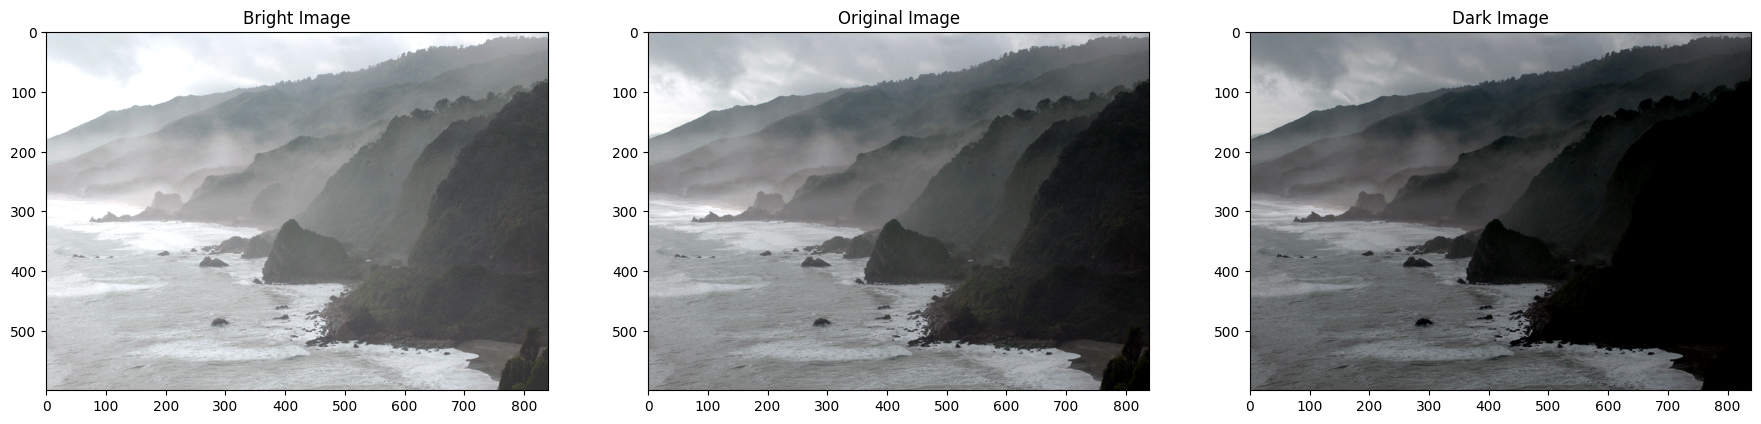

In [8]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_bright = cv.add(img_rgb, matrix)
img_rgb_dark = cv.subtract(img_rgb, matrix)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = [22,8])
axes[0].imshow(img_rgb_bright)
axes[0].set_title("Bright Image")

axes[2].imshow(img_rgb_dark)
axes[2].set_title("Dark Image")

axes[1].imshow(img_rgb)
axes[1].set_title("Original Image")

## Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

Text(0.5, 1.0, 'High contrast Image')

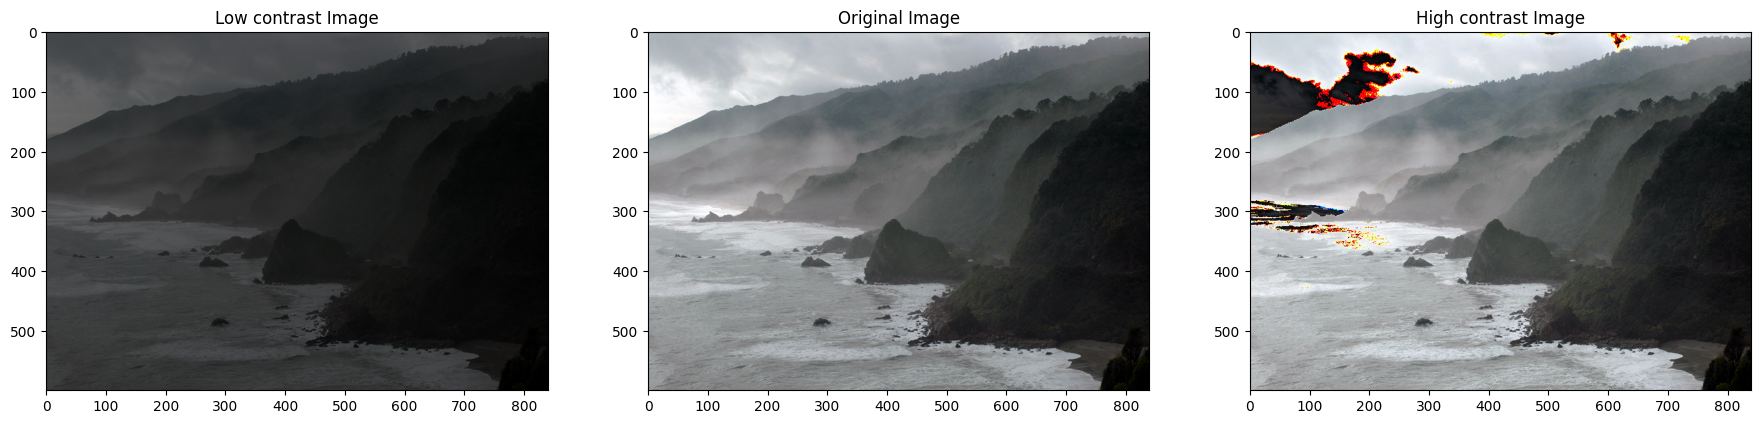

In [ ]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.4
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2

img_low_contrast = np.uint8(cv.multiply(np.float64(img_rgb), matrix_low_contrast))
img_high_contrast = np.uint8(cv.multiply(np.float64(img_rgb), matrix_high_contrast))



fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = [22,8])
axes[0].imshow(img_low_contrast)
axes[0].set_title("Low contrast Image")

axes[1].imshow(img_rgb)
axes[1].set_title("Original Image")

axes[2].imshow(img_high_contrast)
axes[2].set_title("High contrast Image")

### <font color="green">What happened?</font>
Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

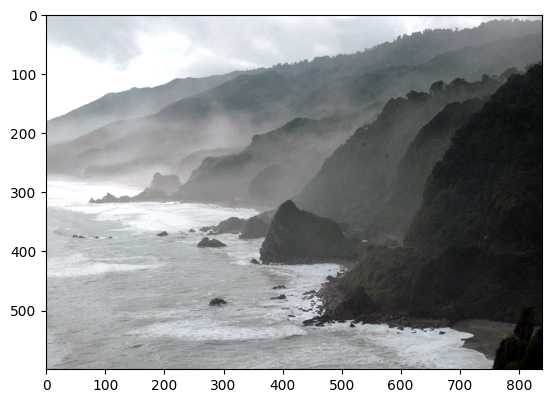

In [22]:
matrix_high_contrast = np.ones(img_rgb.shape) * 1.2
img_rgb_high = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255)) 
plt.imshow(img_rgb_high)

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).

2. `thresh`: threshold value.

3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

4. `type`: thresholding type (see ThresholdTypes).


### <font color="green">Function Syntax </font>

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied

3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html" target="_blank">Documentation link</a>

Text(0.5, 1.0, 'Original Image')

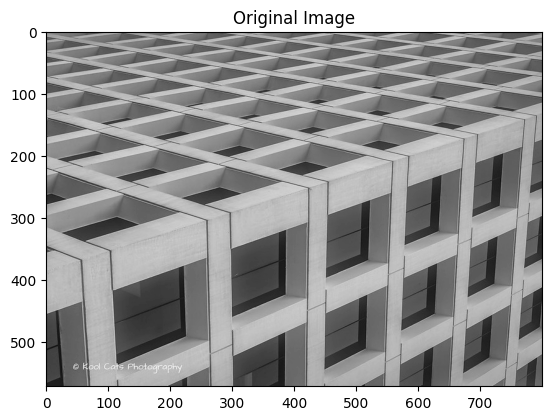

In [35]:
img_buil = cv.imread("image_enhac/building-windows.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img_buil, cmap = "gray")
plt.title("Original Image")

Text(0.5, 1.0, 'Threshold Image')

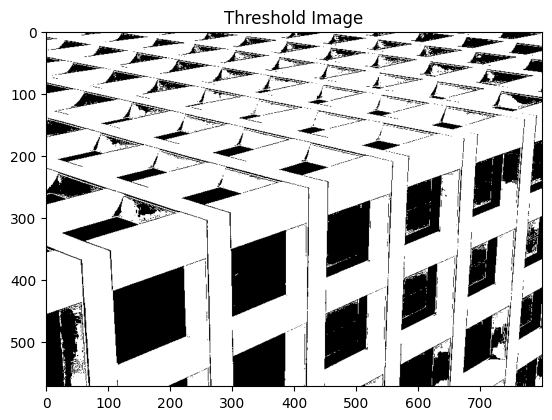

In [47]:
retval, img_threshold = cv.threshold(img_buil, 100, 255, cv.THRESH_BINARY)
plt.imshow(img_threshold, cmap = "gray")
plt.title("Threshold Image")

## Application: Sheet Music Reader
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to
Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding
techniques. Let's take a look at an example.

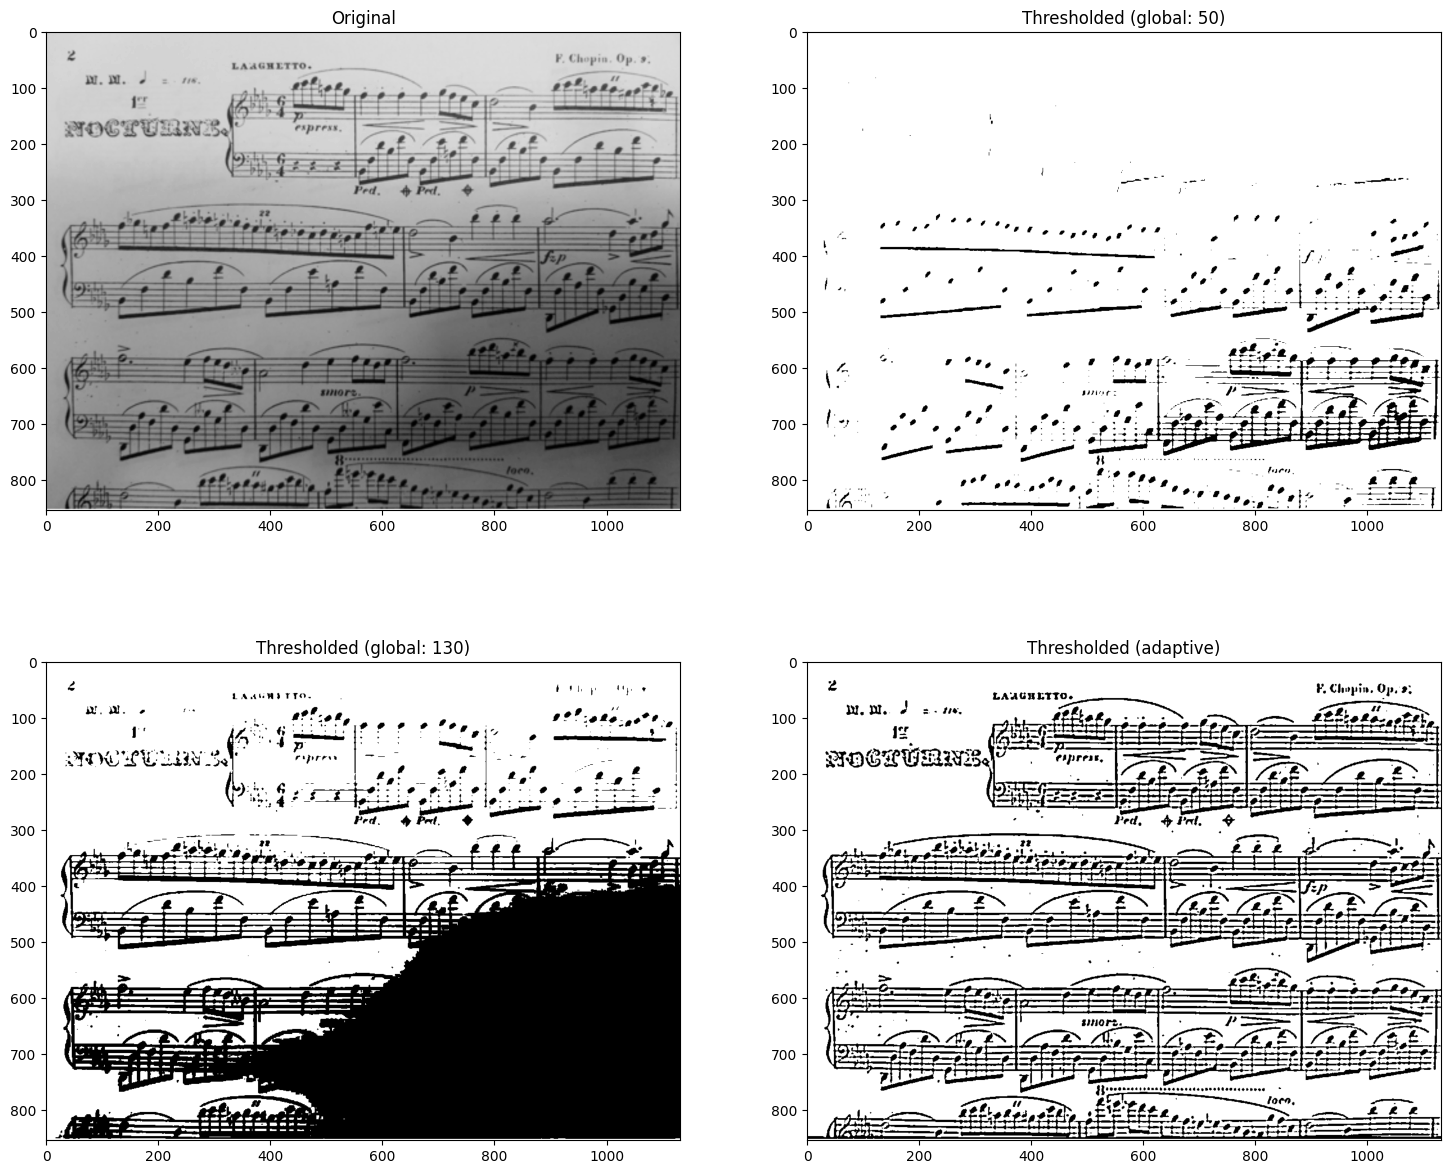

In [55]:
img_music_note = cv.imread("image_enhac/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)


retval, img_global_thres_50 = cv.threshold(img_music_note, 50, 255, cv.THRESH_BINARY)

retval, img_global_thres_130 = cv.threshold(img_music_note, 130, 255, cv.THRESH_BINARY)

img_global_thres_adaptive = cv.adaptiveThreshold(img_music_note, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_music_note,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_global_thres_50,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_global_thres_130,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_global_thres_adaptive,  cmap="gray");  plt.title("Thresholded (adaptive)");

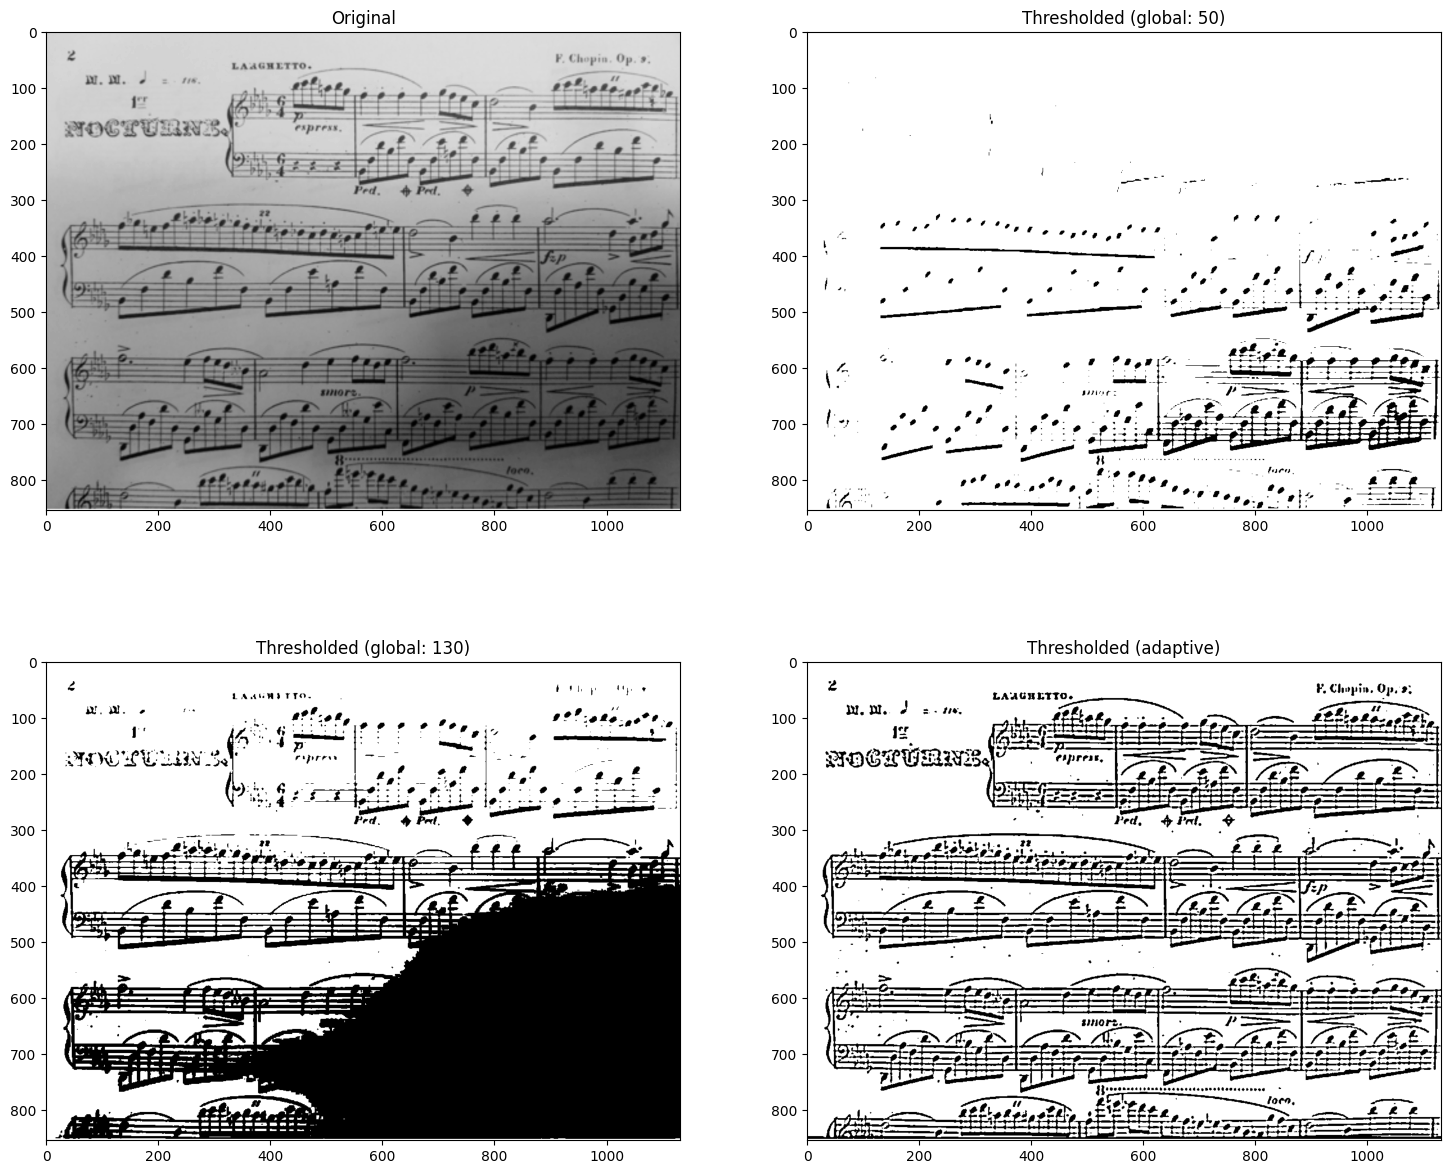

In [ ]:
img_read = cv.imread("./image_enhac/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

# Show the images


## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv2.bitwise_and()`. Others include: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.

2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. <a href="https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html" target="_blank">Arithmetic Operations on Images</a>

2. <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14" target="_blank">bitwise_and(...) function</a>

(200, 499)


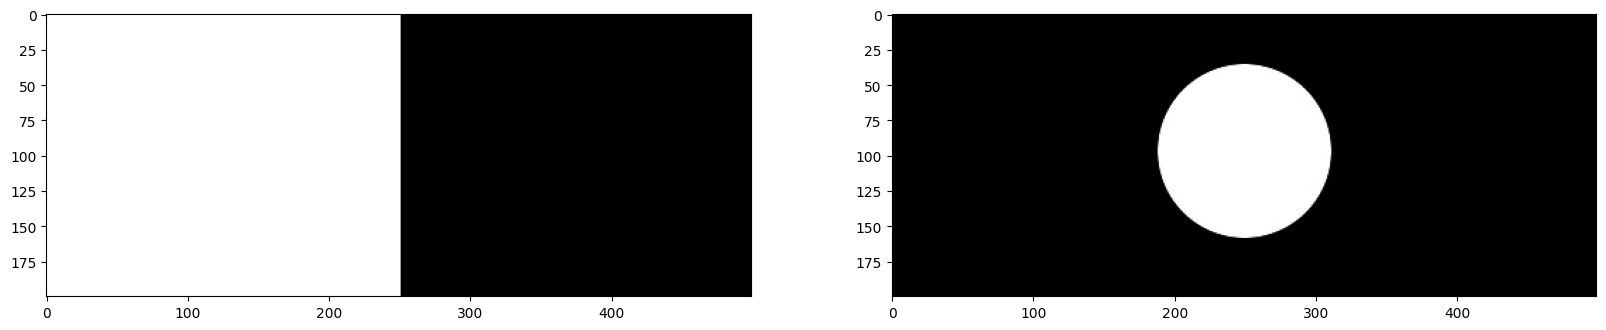

In [56]:
img_rec = cv.imread("image_enhac/rectangle.jpg", cv.IMREAD_GRAYSCALE)

img_cir = cv.imread("image_enhac/circle.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

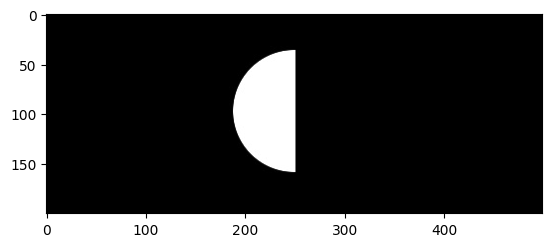

In [58]:
result = cv.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

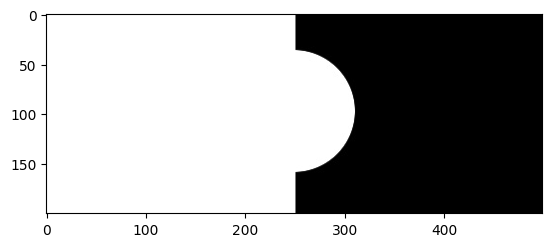

In [60]:
result = cv.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

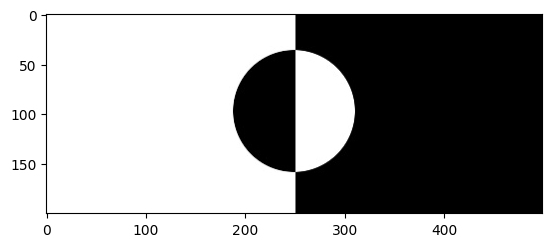

In [61]:
result = cv.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.